# DANS CE PROJET NOUS ALLONS ETUDIER LES DONNEES DE LA BANQUE MONDIALE. 
# EN PARTICULIER LES DONNEES STATISTIQUES SUR L'EDUCATION. 


In [978]:
# COMMENCONS PAR IMPORTER LES LIBRAIRIES NECESSAIRES 
import numpy as np # POUR LE CALCUL MATRICIEL NOTAMMENT
import pandas as pd # POUR LES DATAFRAMES
import matplotlib.pyplot as plt # POUR LES REPRESENTATIONS GRAPHIQUES
import seaborn as sns # pour une plus grande facilité à réaliser des graphiques "attrayants"

### DANS LE DOSSIER A TELECHARGER SE TROUVENT 5 FICHIERS .CSV. NOUS ALLONS LES ETUDIER UN PAR UN

# ***<u>ETUDE DU PREMIER FICHIER : EdStatsCountry</u>***

In [979]:
# definition du path
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsCountry.csv'

In [980]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Country = pd.read_csv(path)

In [981]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE COUNTRY CODE

IL COMPORTE 32 COLONNES COMME LE COUNTRY CODE QUI SERT D'IDENTIFIANT

LES DIFFERENTS NOMS (SHORT, TABLE, LONG)

LE PIB (HIGH, LOW ...)

DES DATES DE RECENSEMENT DE LA POPULATION ET DES PARCELLES AGRICOLES ET AUTRES


In [982]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

CE FICHIER CONTIENT  241 LIGNES NUMEROTEES DE 0 A 240 ET 32 COLONNES NUMEROTEES DE 0 A 31. IL COMPORTE 4 COLONNES DE TYPES FLOAT (NOMBRES DECIMAUX) ET 28 DE TYPE OBJECT (CHAINE DE CARACTERES). 

ON CONSTATE QUE LA COLONNE N° 31 (Unnamed: 31) EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. D'AUTRES COMME LA N°16 (Alternative conversion factor) OU ENCORE LA N°11 (National accounts reference year).... NE SONT QUE PEU REMPLIES. D'AUTRES COMME LA N°5 (Currency Unit) SONT QUASIMENT COMPLETES. ENFIN DES COLONNES TELLES QUE LA N°1 (Short Name) sont complétes. 

In [983]:
Fichier_Country['Vital registration complete'].unique()

array(['Yes', nan, 'Yes. Vital registration for Guernsey and Jersey.'],
      dtype=object)

In [984]:
# DANS UN PREMIER TEMPS ON NE VA CONSERVER QUE LES PAYS QUI ONT UN RENSEIGNEMENT DIF DE NAN DANS LA COLONNE VITAL REGISTRATION COMPLETE
# CETTE COLONNE INDIQUANT LA QUALITE DES DEMARCHES EFFECTUEES A L'ETAT CIVIL (NAISSANCE,DECES, MARIAGE ...)
# CE CHOIX ME SEMBLE PERTINENT AFIN DE DISPOSER ENSUITE DE VALEURS CORRECTES
Fichier_Country=Fichier_Country.loc[(Fichier_Country['Vital registration complete']=='Yes. Vital registration for Guernsey and Jersey.') | (Fichier_Country['Vital registration complete']=='Yes')]

In [985]:
# ON VA DROP TOUTES LES COLONNES QUI ONT PLUS DE 30% DE NAN

Liste_à_drop = []
for features in Fichier_Country.columns:
    if Fichier_Country[features].isnull().sum()>0.3*Fichier_Country.shape[0]:
        Liste_à_drop.append(features)
print(Liste_à_drop)
Fichier_Country=Fichier_Country.drop(Liste_à_drop,axis=1)
Fichier_Country.info()

['Special Notes', 'National accounts reference year', 'Lending category', 'Other groups', 'Alternative conversion factor', 'PPP survey year', 'External debt Reporting status', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Latest agricultural census', 'Latest industrial data', 'Unnamed: 31']
<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 232
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Code                       111 non-null    object 
 1   Short Name                         111 non-null    object 
 2   Table Name                         111 non-null    object 
 3   Long Name                          111 non-null    object 
 4   2-alpha code                       110 non-null    object 
 5   Currency Unit                      111 non-null    object 
 6   Region                             111 non-null    objec

# ***<u>PASSONS AU PROCHAIN FICHIER NOMME EdStatsCountry-Series</u>***


In [986]:
# definition du path
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsCountry-Series.csv'

In [987]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Country_Series = pd.read_csv(path)

In [988]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Country_Series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE COUNTRY CODE

IL COMPORTE 4 COLONNES COMME LE COUNTRY CODE QUI SERT D'IDENTIFIANT

UNE COLONNE NOMMEE SeriesCode EN LIEN CERTAINEMENT AVEFC LE FICHIER EdStatsSeries

UNE COLONNE DESCRIPTION INDIQUANT LA SOURCE DES INFOS. ON CONSTATE QUE LES SOURCES VARIENT. CERTAINES OFFICIELLES COMME L'ONU. D'AUTRES OBTENUES PAR REGRESSION

UNE COLONNE Unnamed: 3 CERTAINEMENT ENTIEREMENT VIDE COMME SUR LE FICHIER PRECEDENT

In [989]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Country_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


CE FICHIER CONTIENT  ***613 LIGNES*** NUMEROTEES DE 0 A 612 ET ***4 COLONNES*** NUMEROTEES DE 0 A 3. IL COMPORTE *****1 COLONNE DE TYPES FLOAT***** (NOMBRES DECIMAUX) ET ***3 DE TYPE OBJECT*** (CHAINE DE CARACTERES).

ON CONSTATE QUE LA COLONNE N° 3 (Unnamed: 3) EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. QUANT AU RESTE DES COLONNES ELLES SONT COMPLETES. 

In [990]:
# ON VA DROP Unnamed: 3

Fichier_Country_Series=Fichier_Country_Series.drop(['Unnamed: 3'],axis=1)



# ***<u>PASSONS AU PROCHAIN FICHIER NOMME EdStatsData</u>***



In [991]:
# definition du path
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsData.csv'

In [992]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Data = pd.read_csv(path)

In [993]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE COUNTRY NAME, CEPENDANT ICI IL SEMBLE PLUTOT S'AGIR DE GROUPE GEOGRAPHIQUE COMME Arab World (Monde Arabe) OU ENCORE East Asia & Pacific (Espace Asie Pacifique). IL FAUDRA EXPLORER PLUS EN PROFONDEUR CES RENSEIGNEMENTS

IL COMPORTE 70 COLONNES COMME LE COUNTRY CODE QUI SERT D'IDENTIFIANT

DEUX COLONNES NOMMEES Country Name ET Country Code QUI REPRESENTENT EN FAIT LES CODE DE REGIONS GEOGRAPHIOQUES AINSI QUE LEUR VERSIONS ABREGEES (EX : Arab World -> ARB)

DEUX COLONNES NOMMEES Indicator Name ET Indicator Code QUI SONT L'INDICATEUR ETUDIE AINSI QUE SON ABREVIATION (EX : Adujstment... -> UIS.NERA.2)

LA DERNIERE NOMMEE Unnamed: 69 CERTAINEMENT VIDE COMME SUR LES FICHIERS PRECEDENT

QUANT AUX 65 COLONNES RESTANTES ELLES REPRESENTENT TOUTES UNE ANNE DIFFERENTES CONTENANT LES VALEURS CONNUES POUR L'INDICATEUR PRECISE DANS LA COLONNE Indicator Name A LA DATE INDIQUEE PAR LA COLONNE. LES ANNEES AVANCENT D'UN PAS DE 1 DE 1970 A 2017 INCLUS PUIS AVANCENT D'UN PAS DE 5 DE 2020 A 2100 INCLUS.




In [994]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      


CE FICHIER CONTIENT  886930 LIGNES NUMEROTEES DE 0 A 886929 ET 70 COLONNES NUMEROTEES DE 0 A 69. IL COMPORTE 66 COLONNE DE TYPES FLOAT (NOMBRES DECIMAUX) ET 4 DE TYPE OBJECT (CHAINE DE CARACTERES). 



ON CONSTATE QUE LA COLONNE N° 69 (Unnamed: 69) EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. LA COLONNE N°51 REPRESENTANT L'ANNEE 2017 EST TRES PEU RENSEIGNEE (SEULEMENT 143 NON-NULL).LES ANNEES TERMINANT PAR 0 OU 5 ENTRE 1970 ET 1990 INCLUS SONT MIEUX RENSEIGNEES QUE LES AUTRES SUR LA MEME PERIODE. CE PHENOMENE CE REPETE DE 1990 A 2000 BIEN QUE SUR CETTE PERIODE LES "FAIBLES" RENSEIGNEMENTS ONT OTUT DE MEME DOUBLES EN VALEUR ABSOLUE. A PARTIR DES ANNEES 1999-2000 JUSQU'EN 2015 LES RENSEIGNEMENTS VONT DE 120K A 200K VOIR 240K. 2016 ET 2017 ETANT TRES MAL RENSEIGNEES LES COLONNES N°52 JUSQU'A 68 c.à.d. DE L'ANNEE 2020 JUSQU'A L'ANNEE 2100 COMPORTE TOUTES 51436 VALEURS NON NULLES (CERTAINEMENT DES PROJECTIONS DE VALEURS)


In [995]:
list(Fichier_Data['Indicator Name'].unique())

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [996]:
list(Fichier_Data['Indicator Code'].unique())

['UIS.NERA.2',
 'UIS.NERA.2.F',
 'UIS.NERA.2.GPI',
 'UIS.NERA.2.M',
 'SE.PRM.TENR',
 'SE.PRM.TENR.FE',
 'UIS.NERA.1.GPI',
 'SE.PRM.TENR.MA',
 'UIS.NERA.3',
 'UIS.NERA.3.F',
 'UIS.NERA.3.GPI',
 'UIS.NERA.3.M',
 'UIS.NIRA.1',
 'UIS.NIRA.1.F',
 'UIS.NIRA.1.GPI',
 'UIS.NIRA.1.M',
 'UIS.LPP.AG15T99',
 'UIS.LP.AG15T99',
 'UIS.LP.AG15T99.F',
 'UIS.LP.AG15T99.M',
 'SE.ADT.LITR.ZS',
 'SE.ADT.LITR.FE.ZS',
 'UIS.LR.AG15T99.GPI',
 'SE.ADT.LITR.MA.ZS',
 'UIS.AFR.AGRADMG.1.PU',
 'UIS.AFR.PBR.1.G1.PU.MATH',
 'UIS.AFR.PBR.1.G2.PU.MATH',
 'UIS.AFR.PBR.1.G3.PU.MATH',
 'UIS.AFR.PBR.1.G4.PU.MATH',
 'UIS.AFR.PBR.1.G5.PU.MATH',
 'UIS.AFR.PBR.1.G6.PU.MATH',
 'UIS.AFR.PBR.1.G7.PU.MATH',
 'UIS.AFR.PBR.1.PU.MATH',
 'UIS.AFR.PBR.1.G1.PU.READ',
 'UIS.AFR.PBR.1.G2.PU.READ',
 'UIS.AFR.PBR.1.G3.PU.READ',
 'UIS.AFR.PBR.1.G4.PU.READ',
 'UIS.AFR.PBR.1.G5.PU.READ',
 'UIS.AFR.PBR.1.G6.PU.READ',
 'UIS.AFR.PBR.1.G7.PU.READ',
 'UIS.AFR.PBR.1.PU.READ',
 'UIS.AFR.CS.1.PU',
 'UIS.AFR.CS.MG.1.PU',
 'UIS.AFR.CS.SG.1.G1.PU',
 'UI

In [997]:
Fichier_Data['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


ON CONSTATE QUE DANS CETTE TABLE LE COUNTRY CODE DESIGNE DES PAYS MAIS AUSSI DES ZONES REGIONALES (COMME ASIE DE L'EST ET PACIFIQUE (AVEC LES LOW INCOME INCLUS OU NON), PAYS DE L'OCDE, ZONE EURO...) VOIR LA TOTALITE DU MONDE.


In [998]:
# ON VA DROP TOUTES LES COLONNES QUI N'ONT PAS AU MOINS 5% DE NON NULL

Liste_à_drop = []
for features in Fichier_Data.columns:
    if Fichier_Data[features].isnull().sum()>0.95*Fichier_Data.shape[0]:
        Liste_à_drop.append(features)
print(Liste_à_drop)
Fichier_Data=Fichier_Data.drop(Liste_à_drop,axis=1)
Fichier_Data.info()

['1971', '1972', '1973', '1974', '1976', '1977', '1978', '1979', '1981', '1982', '1983', '1984', '1986', '1987', '1988', '1989', '2016', '2017', 'Unnamed: 69']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1975            87306 non-null   float64
 6   1980            89122 non-null   float64
 7   1985            90296 non-null   float64
 8   1990            124405 non-null  float64
 9   1991            74437 non-null   float64
 10  1992            75543 non-null   float64
 11  1993            75793 non-null   float64
 12  1994            77462 non-null   float64
 13  1995            131361 non-null  f

In [999]:
# ON VA MAINTENANT DROP LES LIGNES TROP PEU RENSEIGNEES (C.A.D. QUI ONT SEULEMENT LES QUATRES PREMIERES COLONNES COMPLETEES)

Fichier_Data=Fichier_Data.dropna(thresh=22)
# J'AI CHOISI UNE LIMITE A AU MOINS 22 NON NULL DANS LA LIGNE AFIN D'INCLURE LES LIGNES QUI ONT AU MOINS UNE DONNEE SUPPLEMENTAIRE
# QUE LES 4 PREMIERES(QUI NE MANQUENT NULLE PART) ET LES 17 DERNIERES QUI SONT DES PROJECTIONS
Fichier_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127594 entries, 4 to 886921
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    127594 non-null  object 
 1   Country Code    127594 non-null  object 
 2   Indicator Name  127594 non-null  object 
 3   Indicator Code  127594 non-null  object 
 4   1970            17424 non-null   float64
 5   1975            26745 non-null   float64
 6   1980            27763 non-null   float64
 7   1985            29474 non-null   float64
 8   1990            64454 non-null   float64
 9   1991            66081 non-null   float64
 10  1992            67030 non-null   float64
 11  1993            67634 non-null   float64
 12  1994            68868 non-null   float64
 13  1995            68729 non-null   float64
 14  1996            68617 non-null   float64
 15  1997            66312 non-null   float64
 16  1998            65847 non-null   float64
 17  1999           

In [1000]:
Fichier_Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1975,1980,1985,1990,1991,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,59.365540,65.617767,69.033211,71.995819,72.602837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,48.363892,56.486790,61.520870,65.827492,66.797028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.691760,0.759440,0.806770,0.844660,0.854320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,69.914551,74.379982,76.255493,77.933853,78.187492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,52.448921,54.865627,62.559566,64.613091,67.080444,67.508705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1001]:
Fichier_Data.loc[Fichier_Data['Country Code']=='ABW']

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1975,1980,1985,1990,1991,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
125853,Aruba,ABW,GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125855,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125985,Aruba,ABW,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126291,Aruba,ABW,Official entrance age to lower secondary educa...,SE.SEC.AGES,12.0,12.0,12.0,12.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126293,Aruba,ABW,Official entrance age to pre-primary education...,UIS.THAGE.0,4.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128262,Aruba,ABW,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.96,6.42,5.89,5.36,4.81,4.26,3.71,3.19,2.71,2.28
128263,Aruba,ABW,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,13.77,12.62,11.51,10.43,9.39,8.36,7.36,6.40,5.52,4.72
128264,Aruba,ABW,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,13.73,14.30,14.82,15.31,15.72,15.96,16.01,15.91,15.70,15.42
128265,Aruba,ABW,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,12.27,13.10,13.79,14.43,14.95,15.27,15.40,15.35,15.19,14.95


# ***<u>PASSONS AU PROCHAIN FICHIER NOMME EdStatsFootNote</u>***

In [1002]:
#definition du path
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsFootNote.csv'

In [1003]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_FootNote = pd.read_csv(path)

In [1004]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_FootNote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [1005]:
Fichier_FootNote.loc[(Fichier_FootNote['Year']=='YR2050')]

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
24551,AUS,SP.POP.0014.FE.IN,YR2050,"Including Christmas Island, Cocos (Keeling) Is...",NaN
24559,AUS,SP.POP.0014.MA.IN,YR2050,"Including Christmas Island, Cocos (Keeling) Is...",NaN
24567,AUS,SP.POP.0014.TO,YR2050,"Including Christmas Island, Cocos (Keeling) Is...",NaN
24575,AUS,SP.POP.0014.TO.ZS,YR2050,"Including Christmas Island, Cocos (Keeling) Is...",NaN
24583,AUS,SP.POP.1564.FE.IN,YR2050,"Including Christmas Island, Cocos (Keeling) Is...",NaN
...,...,...,...,...,...
599662,TZA,SP.POP.1564.TO,YR2050,Including Zanzibar.,NaN
599670,TZA,SP.POP.TOTL.FE.IN,YR2050,Including Zanzibar.,NaN
599678,TZA,SP.POP.TOTL.FE.ZS,YR2050,Including Zanzibar.,NaN
599686,TZA,SP.POP.TOTL.MA.IN,YR2050,Including Zanzibar.,NaN



DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE COUNTRY CODE, ABW POUR ARUBA COMME ON A PU LE VOIR DANS LE 1ER FICHIER. IL FAUDRA EXPLORER PLUS EN PROFONDEUR CES RENSEIGNEMENTS

IL COMPORTE 5 COLONNES COMME LE COUNTRY CODE QUI SERT D'IDENTIFIANT

UNE COLONNE CountryCode REFERENCANT LA ZONE GEOGRAPHIQUE

UNE COLONNE NOMMEE SeriesCode REFERENCANT LE CODE DE LA SERIE DE DONNEES

UNE COLONNE Year RENSEIGNANT L'ANNEE A LAQUELLE SE RAPPORTE LA SERIE

UNE COLONNE DESCRIPTION EXPLIQUANT SI LA DONNEE EST UNE ESTIMATION OU UNE DONNEE COLLECTEE

LA DERNIERE NOMMEE Unnamed: 4 CERTAINEMENT VIDE COMME SUR LES FICHIERS PRECEDENT


In [1006]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_FootNote.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB



CE FICHIER CONTIENT  643638 LIGNES NUMEROTEES DE 0 A 643637 ET 5 COLONNES NUMEROTEES DE 0 A 4. IL COMPORTE 1 COLONNE DE TYPES FLOAT (NOMBRES DECIMAUX) ET 4 DE TYPE OBJECT (CHAINE DE CARACTERES). 

ON CONSTATE QUE LA COLONNE N° 4 (Unnamed: 4) EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. QUANT AUX AUTRES COLONNE ELLES SONT TOUTES COMPLETES


In [1007]:
# ON VA DROP la colonne Unnamed: 4

Fichier_FootNote=Fichier_FootNote.drop(['Unnamed: 4'],axis=1)

# ***<u>PASSONS AU PROCHAIN FICHIER NOMME EdStatsSeries</u>***

In [1008]:
#definition du path
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsSeries.csv'

In [1009]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Series = pd.read_csv(path)

In [1010]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE Series Code, IL SEMBLERAIT QUE DANS LE NOM SE TROUVE LA TRNACHE D'AGE ETUDIE PAR EXEMPLE 1519 POUR LES 15-19 ANS. IL FAUDRA EXPLORER PLUS EN PROFONDEUR CES RENSEIGNEMENTS

L'ENSEMBLE DES COLONNES A POUR BUT DE RENSEIGNER LA MANIERE DONT ONT ETE COLLECTEES LES DONNEES, LES SOURCES UTILISEES, LES UNITES DE MESURES...

In [1011]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    


CE FICHIER CONTIENT  3665 LIGNES NUMEROTEES DE 0 A 3664 ET 21 COLONNES NUMEROTEES DE 0 A 20. IL COMPORTE 6 COLONNE DE TYPES FLOAT (NOMBRES DECIMAUX) ET 15 DE TYPE OBJECT (CHAINE DE CARACTERES). 
A NOTER QUE TOUTES LES COLONNES DE TYPES FLOAT SONT ENTIEREMENT VIDES


LES COLONNES N° 0, 1, 2, 4, 13 SONT COMPLETES. LA COLONNE N°3 Short Definition EST QUANT A ELLE COMPLETES A ENVIRON 60%. QUANT AUX AUTRES ELLES NE DEPASSENT PAS LES 552 RENSEIGNEMENTS (ENVIRON 15%). ENFIN LES N° 5, 11, 17, 18, 19, 20 SONT ENTIEREMENT VIDES

In [1012]:
# ON VA DROP TOUTES LES COLONNES QUI N'ONT PAS AU MOINS 70% DE NON NULL

Liste_à_drop = []
for features in Fichier_Series.columns:
    if Fichier_Series[features].isnull().sum()>0.3*Fichier_Series.shape[0]:
        Liste_à_drop.append(features)
print(Liste_à_drop)
Fichier_Series=Fichier_Series.drop(Liste_à_drop,axis=1)
Fichier_Series.info()

['Short definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Series Code      3665 non-null   object
 1   Topic            3665 non-null   object
 2   Indicator Name   3665 non-null   object
 3   Long definition  3665 non-null   object
 4   Source           3665 non-null   object
dtypes: object(5)
memory usage: 143.3+ KB


# ***<u>FIN ETUDE PRELIMINAIRE</u>***

REPRISE DE L'ANALYSE

LE FICHIER "Fichier_Series" NE SEMBLE PAS PERTINENT POUR L'ANALYSE (IL DETAILLE EN FAIT LA METHODOLOGIE APPLIQUEE POUR RECUEUILLIR L'ENSEMBLE DES DONNEES)

DE MEME POUR "Fichier_Footnote" AINSI QUE "Fichier_Country_Series" QUI LA AUSSI SONT DES FICHIERS DE METHODOLOGIE.

# ***<u>SUITE DE L'ETUDE</u>***

NOUS ALLONS REGROUPER LES INFORMATIONS LES INFORMATIONS FOURNIES DANS LE DATAFRAME "Fichier_Data" DES ANNEES 2011 A 2015 AFIN D'AVOIR DES DONNEES EXPLOITABLES

In [1013]:
Fichier_Data['Periode 2011-2015']=Fichier_Data[['2011', '2012', '2013', '2014', '2015']].sum(axis=1)
Fichier_Data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1975,1980,1985,1990,1991,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Periode 2011-2015
886917,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,212.14,179.40,150.11,126.43,106.82,91.70,78.21,67.56,59.06,721.56
886918,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,494.23,420.47,352.09,294.10,244.68,205.47,171.39,144.86,124.17,1474.43
886919,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,3469.66,3493.32,3491.72,3468.64,3429.54,3378.61,3317.67,3248.91,3175.64,1722.96
886920,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,3106.84,3078.78,3041.50,3000.74,2961.23,2924.73,2889.02,2851.65,2813.31,1873.55
886921,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,6576.50,6572.10,6533.22,6469.39,6390.77,6303.34,6206.69,6100.56,5988.95,3596.51


In [1014]:
# ON VA MAINTENANT CREER UN DATAFRAME DONT LES COLONNES SERONT "COUNTRY CODE" AINSI QUE CHAQUE INDICATOR Name PRESENTS 
# DANS LA COLONNE "INDICATOR NAME" ACTUELLE. POUR LES VALEURS DE CES COLONNES NOUS UTILISERONS LES VALEURS "PERIODE 2011-2015"

DF_pivot=Fichier_Data.pivot(index='Country Code',columns='Indicator Name',values='Periode 2011-2015')
DF_pivot=DF_pivot.reset_index()

DF_pivot


Indicator Name,Country Code,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net intake rate to Grade 1 of primary education, both sexes (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.01,12.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,513.24,1030.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5880.03,11703.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.733849,...,634.93,953.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1015]:

# Calculer le pourcentage de NaN pour chaque colonne (indicateur)
POURCENTAGE_NAN = DF_pivot.isnull().mean() * 100


In [1016]:

# Exclure la colonne 'Country Code'
POURCENTAGE_NAN = POURCENTAGE_NAN.drop('Country Code')


In [1017]:

# Définition de la limite
limite = 30


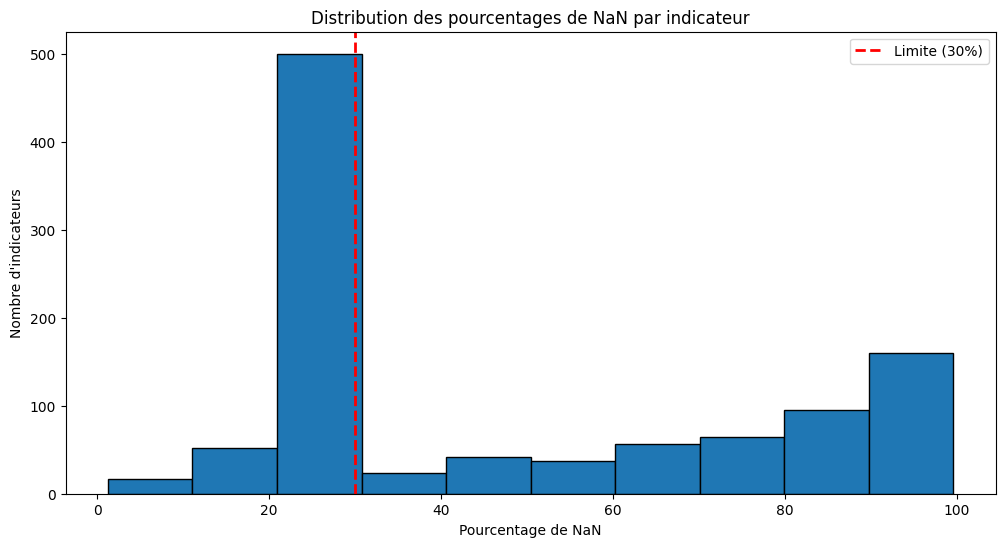

In [1018]:
# Visualisation avec un histogramme
plt.figure(figsize=(12, 6))
plt.hist(POURCENTAGE_NAN, bins=10, edgecolor='black')
plt.axvline(limite, color='r', linestyle='--', linewidth=2, label=f'Limite ({limite}%)')
plt.title(f"Distribution des pourcentages de NaN par indicateur")
plt.xlabel("Pourcentage de NaN")
plt.ylabel("Nombre d'indicateurs")
plt.legend()
plt.show()



In [1019]:
# NOUS ALLONS MAINTENANT DROP LES COLONNES CONTENANT PLUS DE 30% DE NAN

Liste_à_drop=[]
for features in DF_pivot.columns:
    if DF_pivot[features].isnull().sum()>0.3*DF_pivot.shape[0]:
        Liste_à_drop.append(features)
print(Liste_à_drop)
DF_pivot=DF_pivot.drop(Liste_à_drop,axis=1)
DF_pivot.info()

['Adjusted net enrolment rate, lower secondary, both sexes (%)', 'Adjusted net enrolment rate, lower secondary, female (%)', 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)', 'Adjusted net enrolment rate, lower secondary, male (%)', 'Adjusted net enrolment rate, primary, both sexes (%)', 'Adjusted net enrolment rate, primary, female (%)', 'Adjusted net enrolment rate, primary, gender parity index (GPI)', 'Adjusted net enrolment rate, primary, male (%)', 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)', 'Adjusted net intake rate to Grade 1 of primary education, female (%)', 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)', 'Adjusted net intake rate to Grade 1 of primary education, male (%)', 'Adult illiterate population, 15+ years, % female', 'Adult illiterate population, 15+ years, both sexes (number)', 'Adult illiterate population, 15+ years, female (number)', 'Adult illiterate population, 15+ year

In [1020]:
DF_pivot

Indicator Name,Country Code,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)","Enrolment in secondary general, both sexes (number)","Enrolment in secondary general, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),"GDP per capita, PPP (constant 2011 international $)",...,"School life expectancy, primary, female (years)","School life expectancy, primary, male (years)",Theoretical duration of lower secondary education (years),Theoretical duration of pre-primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)"
0,ABW,NaN,NaN,NaN,NaN,NaN,2.584464e+09,NaN,25324.720362,NaN,...,NaN,NaN,10.0,10.0,30.0,25.0,15.0,NaN,NaN,NaN
1,AFG,29596886.0,11887343.0,12341788.0,4298870.0,NaN,9.777887e+10,NaN,3085.938619,NaN,...,21.56246,30.27947,15.0,14.0,30.0,30.0,15.0,63.200000,37.500000,41.800000
2,AGO,NaN,NaN,NaN,NaN,4.768912e+11,5.741655e+11,18310.079726,22106.985532,30586.107437,...,NaN,NaN,15.0,5.0,30.0,30.0,15.0,33.700000,28.900001,30.999999
3,ALB,1005265.0,474986.0,1583049.0,772406.0,6.295122e+10,6.255044e+10,21753.200843,21611.436195,52742.476855,...,20.75275,21.28889,20.0,15.0,25.0,35.0,15.0,72.300000,81.200000,77.600000
4,AND,NaN,NaN,NaN,NaN,1.599646e+10,1.605049e+10,198051.629105,198442.821438,NaN,...,NaN,NaN,20.0,15.0,30.0,30.0,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,NaN,NaN,NaN,NaN,1.332350e+11,1.894973e+11,5226.497196,7399.381547,17879.292638,...,NaN,NaN,15.0,15.0,30.0,30.0,15.0,195.700001,48.700001,86.600000
238,ZAF,28220946.0,13694903.0,13989809.0,7233632.0,2.021189e+12,1.848751e+12,37887.032335,34745.602560,61906.509776,...,27.16209,27.74080,10.0,5.0,35.0,25.0,15.0,135.800001,114.400000,124.000002
239,ZMB,9240723.0,4605380.0,2182525.0,1018080.0,1.199721e+11,1.253140e+11,7900.824638,8282.321491,17706.911874,...,23.21163,23.30722,10.0,20.0,35.0,25.0,15.0,46.400000,42.700000,44.600000


ON CONSTATE QUE CERTAINS PAYS ONT ENCORE UN GRAND NOMBRE DE RENSEIGNEMENTS MANQUANTS

VERIFIONS CA


In [1021]:

# Calculer le pourcentage de NaN pour chaque pays
POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values(ascending=False)
POURCENTAGE_NAN_LIGNE

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1392\1899575270.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values(ascending=False)


Country Code
MAF    98.854962
MNP    98.854962
XKX    98.854962
CUW    98.091603
ASM    98.091603
         ...    
VEN     0.000000
WSM     0.000000
VUT     0.000000
ZAF     0.000000
ZMB     0.000000
Length: 241, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1392\3753837851.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


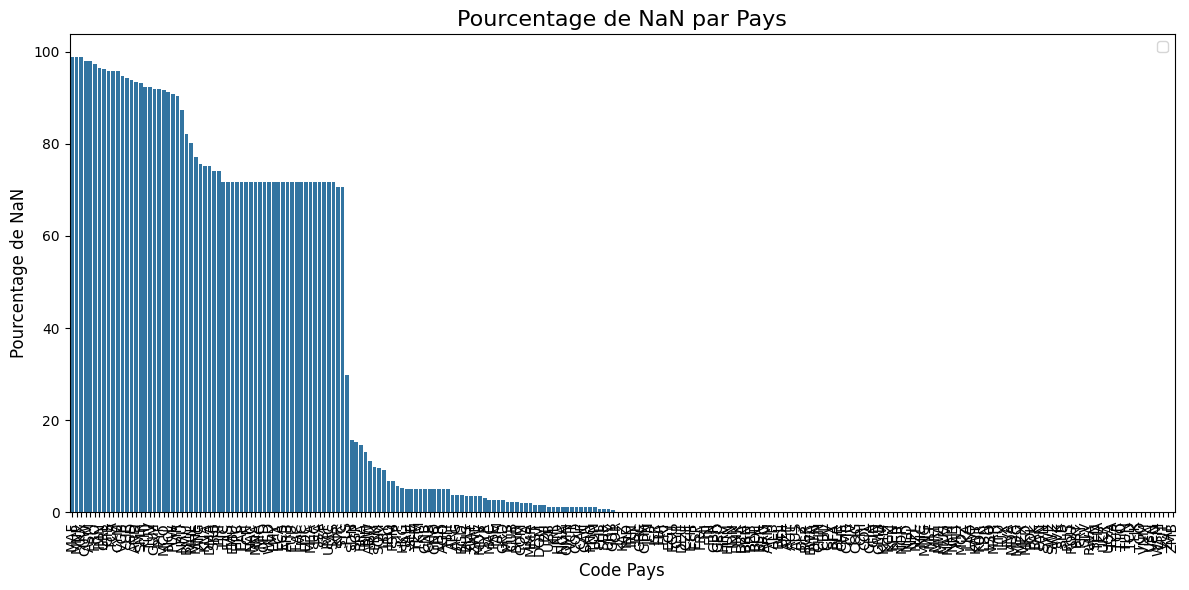

In [1022]:

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(12, 6))

# Créer le diagramme en barres
sns.barplot(x=POURCENTAGE_NAN_LIGNE.index, y=POURCENTAGE_NAN_LIGNE.values, ax=ax)



# Personnaliser le graphique
ax.set_title('Pourcentage de NaN par Pays', fontsize=16)
ax.set_xlabel('Code Pays', fontsize=12)
ax.set_ylabel('Pourcentage de NaN', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # Rotation des étiquettes de l'axe x

# Ajouter une légende
ax.legend()

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1392\1341931932.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1392\1341931932.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


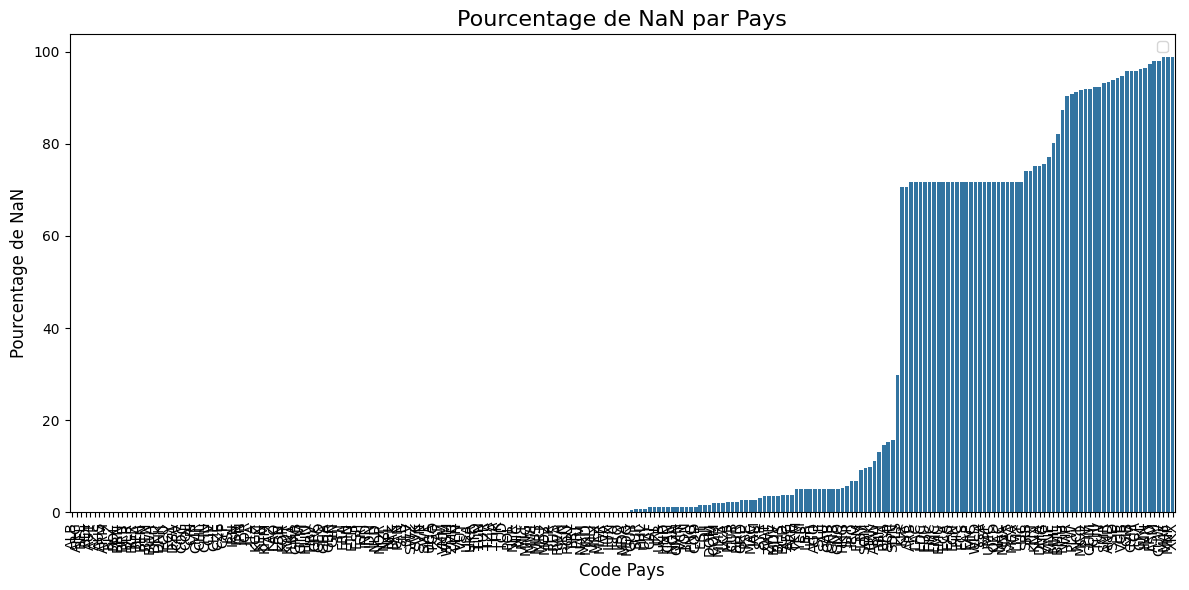

In [1023]:
POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values()
# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(12, 6))

# Créer le diagramme en barres
sns.barplot(x=POURCENTAGE_NAN_LIGNE.index, y=POURCENTAGE_NAN_LIGNE.values, ax=ax)



# Personnaliser le graphique
ax.set_title('Pourcentage de NaN par Pays', fontsize=16)
ax.set_xlabel('Code Pays', fontsize=12)
ax.set_ylabel('Pourcentage de NaN', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # Rotation des étiquettes de l'axe x

# Ajouter une légende
ax.legend()

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

ON PEUT VOIR SUR CE GRAPHIQUE QU'UNE PARTIE DES PAYS SEMBLENT N'AVOIR AUCUNE INFO MANQUANTES. NOUS ALLONS NOUS CONCENTRER SUR CES DERNIERS

In [1024]:
# Calculer le pourcentage de NaN pour chaque pays
POURCENTAGE_NAN_LIGNEs = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1)


# Compter le nombre de pays complets
pays_complet = np.sum(POURCENTAGE_NAN_LIGNE == 0)


print(f"Nombre de pays complet: {pays_complet}")


Nombre de pays complet: 122


C:\Users\lenovo\AppData\Local\Temp\ipykernel_1392\1178377232.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  POURCENTAGE_NAN_LIGNEs = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1)


IL Y A DONC 122 PAYS COMPLETS. NOUS ALLONS LES CONSERVER ET ELIMINER LES AUTRES

In [1025]:
# DROP DES LIGNES AVEC AU MOINS UN NAN
DF_pivot=DF_pivot.dropna(axis=0,how='any')
DF_pivot=DF_pivot.reset_index(inplace=True)
DF_pivot.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [975]:
DF_pivot.head()

Indicator Name,index,Country Code,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)","Enrolment in secondary general, both sexes (number)","Enrolment in secondary general, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),...,"School life expectancy, primary, female (years)","School life expectancy, primary, male (years)",Theoretical duration of lower secondary education (years),Theoretical duration of pre-primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)"
0,3,ALB,1.005265e+06,4.749860e+05,1.583049e+06,7.724060e+05,6.295122e+10,6.255044e+10,21753.200843,21611.436195,...,20.75275,21.28889,20.0,15.0,25.0,35.0,15.0,72.300000,81.2,77.600000
1,7,ARG,1.935458e+07,9.462236e+06,1.748260e+07,8.948278e+06,2.247818e+12,2.739202e+12,52850.325271,64385.610714,...,20.26359,20.52856,15.0,15.0,30.0,30.0,15.0,43.000000,31.0,36.000000
2,8,ARM,7.028900e+05,3.286460e+05,8.951850e+05,4.347080e+05,5.342784e+10,5.404575e+10,18451.361095,18668.022266,...,0.00000,0.00000,25.0,15.0,20.0,39.0,14.0,95.000000,81.2,87.799999
3,11,AUS,1.056203e+07,5.131155e+06,7.891633e+06,3.912629e+06,6.209347e+12,7.300911e+12,268855.147736,316483.686802,...,22.29280,22.39747,20.0,5.0,35.0,30.0,10.0,28.500000,27.7,28.199999
4,12,AUT,1.635557e+06,7.939797e+05,2.202779e+06,1.103022e+06,2.037197e+12,2.094566e+12,239811.536892,246651.107243,...,16.00696,16.18157,20.0,15.0,20.0,40.0,20.0,25.400001,26.8,26.100000
